In [39]:
import pandas as pd
import numpy as np

dfs = pd.read_excel(f'Maanteeameti_tekstilised_vastused.xlsx', sheetname=None)

C:\Users\Ranet\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [70]:
df_1 = pd.DataFrame({'X': dfs['Sheet1']['Küsimus 2'], 'y': dfs['Sheet1']['Küsimus 1']})
df_2 = pd.DataFrame({'X': dfs['Sheet1']['Küsimus 4'], 'y': dfs['Sheet1']['Küsimus 3']})

print(len(df_1))
print(len(df_2))

108827
108827


In [77]:
df_1 = df_1.dropna(axis=0, how='any')
df_2 = df_2.dropna(axis=0, how='any')

print(len(df_1))
print(len(df_2))

df = df_1.append(df_2)
print(len(df))

103038
90134
193172


In [93]:
df.head(10)

,X,y
0,Kõik läks sujuvalt ja probleemideta.,10.0
2,väga hea teenindamine!,10.0
3,sobralik ja kiire teenindus,10.0
5,Väga abivalmis ja meeldiv teenindaja.....,10.0
6,Mõlemad teenindajad olid väga sõbralikud ja as...,10.0
8,Väga sõbralik ja kiire teenindus oli.,8.0
9,"Viisakas, sõbralik, meeldiv.",10.0
10,Sõidu eksamineerija ei olnud viisakas ja ebamu...,3.0
11,Väga abivalmis ja kiire.,8.0
12,"Minuga tegeleti kiiresti, sain kõikidele küsim...",10.0


In [120]:
X = df['X']
y = [0 if y < 5.0 else 1 for y in df['y']]

pos_count =  y.count(1)
neg_count = y.count(0)
print('Total documents: ', len(df['y']))
print('Number of positives: ', pos_count)
print('Number of negatives: ', neg_count)
print('Number of neutral (5 rating): ', len([y for y in df['y'] if y == 5.0]))

Total documents:  193172
Number of positives:  184125
Number of negatives:  9047
Number of neutral (5 rating):  6673


In [121]:
X_balanced = []
y_balanced = []

for i, x in enumerate(X):
    if y[i] == 0:
        X_balanced.append(x)
        y_balanced.append(y[i])
    else:
        if y_balanced.count(1) < neg_count:
            X_balanced.append(x)
            y_balanced.append(y[i])
            
print(len(y_balanced))
print(y_balanced.count(0))
print(y_balanced.count(1))

18094
9047
9047


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
#                       ('tfidf', TfidfTransformer()),
#                       ('clf', MultinomialNB()),
# ])
# text_clf = text_clf.fit(X_train, y_train)
# text_clf.score(X_val, y_val)

# y_pred = text_clf.predict(X_val)


X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2)

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])
text_clf = text_clf.fit(X_train_balanced, y_train_balanced)
print(text_clf.score(X_val_balanced, y_val_balanced))

y_pred = text_clf.predict(X_val_balanced)

0.903011881735286


In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val_balanced, y_pred)

array([[1721,   92],
       [ 259, 1547]], dtype=int64)

Confusion matrix, without normalization
[[1721   92]
 [ 259 1547]]
Normalized confusion matrix
[[0.95 0.05]
 [0.14 0.86]]


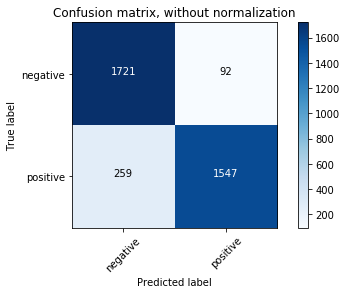

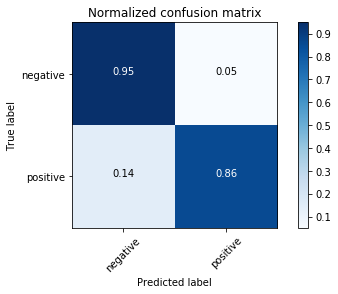

In [127]:
import itertools
import matplotlib.pyplot as plt

class_names = ['negative', 'positive']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val_balanced, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()